In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error

In [154]:
df = pd.read_csv('Live.csv')

In [155]:
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4', 'status_published'], axis=1)

In [156]:
df = df.dropna()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      7050 non-null   object
 1   status_type    7050 non-null   object
 2   num_reactions  7050 non-null   int64 
 3   num_comments   7050 non-null   int64 
 4   num_shares     7050 non-null   int64 
 5   num_likes      7050 non-null   int64 
 6   num_loves      7050 non-null   int64 
 7   num_wows       7050 non-null   int64 
 8   num_hahas      7050 non-null   int64 
 9   num_sads       7050 non-null   int64 
 10  num_angrys     7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


Linear Regression

In [158]:
df_encoded = pd.get_dummies(df, columns=['status_type'], drop_first=True)

In [159]:
x_linearReg = df_encoded.drop(['status_id', 'num_reactions'], axis=1)
y_linearReg = df_encoded['num_reactions']

In [160]:
X_linearReg_train, X_linearReg_test, y_linearReg_train, y_linearReg_test = train_test_split(x_linearReg, y_linearReg, test_size=0.2, random_state=48)

In [161]:
model_linear = LinearRegression()

In [162]:
model_linear.fit(X_linearReg_train, y_linearReg_train)

LinearRegression()

In [163]:
y_linear_pred = model_linear.predict(x_linearReg)

In [164]:
df['Linear Prediction Reaction'] = y_linear_pred

Logistic Regression

In [165]:
df_encoded['high_reactions'] = df_encoded['num_reactions'] > 200

In [166]:
x_logReg = df_encoded.drop(['status_id', 'num_reactions', 'high_reactions'], axis=1)
y_logReg = df_encoded['high_reactions']

In [167]:
x_logReg.shape

(7050, 11)

In [168]:
y_logReg = y_logReg.values.reshape(-1,1)

In [169]:
y_logReg.shape

(7050, 1)

In [170]:
X_logReg_Train, X_logReg_Test, y_logReg_Train, y_logReg_Test = train_test_split(x_logReg, y_logReg, test_size=0.2, random_state=42)

In [171]:
scaler = StandardScaler()
X_logReg_Train_scaled = scaler.fit_transform(X_logReg_Train)
X_logReg_Test_scaled = scaler.fit_transform(X_logReg_Test)

In [172]:
model_logReg = LogisticRegression()

In [173]:
model_logReg.fit(X_logReg_Train_scaled, y_linearReg_train)

/Users/ronitguptaaa/opt/anaconda3/envs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
y_logReg_pred = model_logReg.predict(X_logReg_Test_scaled)
accuracy = accuracy_score(y_logReg_Test, y_logReg_pred)

In [177]:
accuracy

0.1276595744680851

In [178]:
cm = confusion_matrix(y_logReg_Test, y_logReg_pred)

KMeans Analysis

In [182]:
X_KMeans = df_encoded.drop(['status_id', 'num_reactions', 'high_reactions'], axis=1)

In [183]:
X_KMeans_scaled = scaler.fit_transform(X_KMeans)

In [184]:
inertia = []
k = range(1,11)
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_KMeans_scaled)
    inertia.append(km.inertia_)

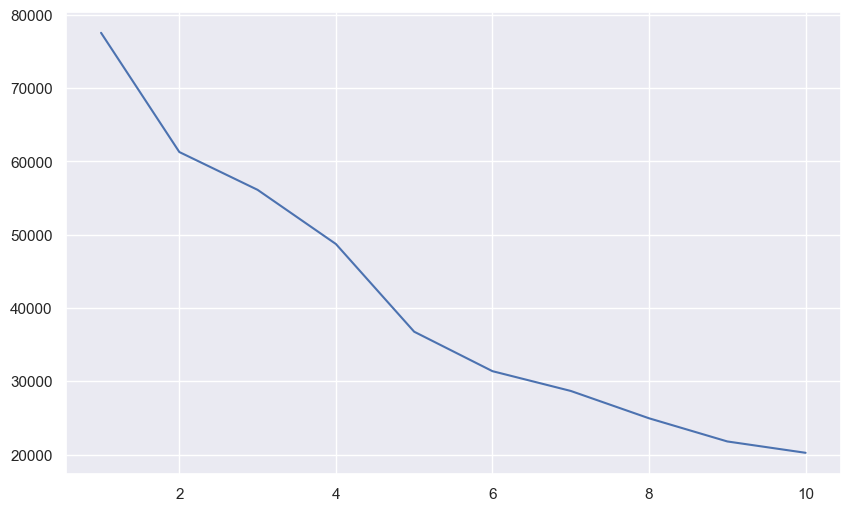

In [185]:
plt.figure(figsize=(10,6))
plt.plot(k,inertia)

In [186]:
cluster = 2
km = KMeans(n_clusters=cluster)
df['cluster'] = km.fit_predict(X_KMeans_scaled)

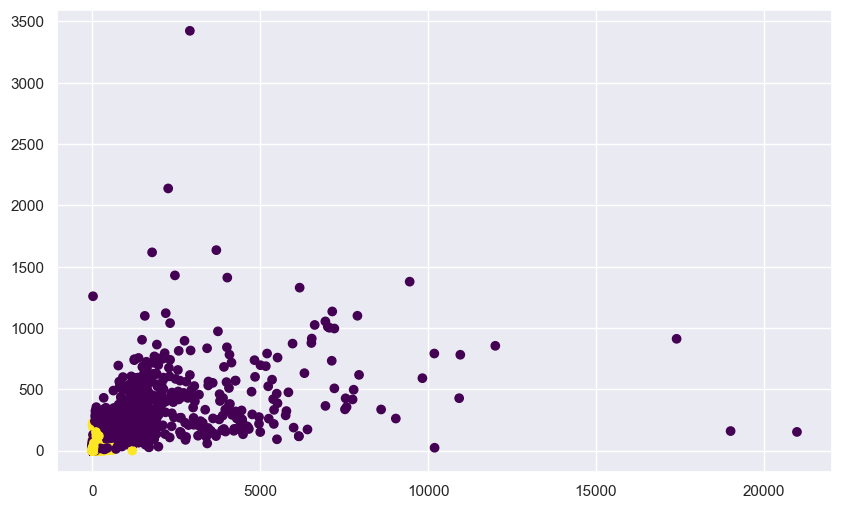

In [193]:
plt.figure(figsize=(10,6))
plt.scatter(df['num_comments'], df['num_shares'], c=df['cluster'], cmap='viridis')